<a href="https://colab.research.google.com/github/megadeazzahra/Machine-Learning-UTS/blob/main/UTS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PREDICT WINE**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib  # untuk menyimpan model

# Preprocessing Data

## Load dan Cek Data

In [3]:
train = pd.read_csv('/content/drive/MyDrive/machine learning (sem 6)/data_training.csv')
test = pd.read_csv('/content/drive/MyDrive/machine learning (sem 6)/data_testing.csv')
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.3,0.740,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8,5,1366
1,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.99670,3.29,0.51,9.2,5,103
2,10.1,0.430,0.40,2.6,0.092,13.0,52.0,0.99834,3.22,0.64,10.0,7,942
3,12.9,0.500,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9,6,811
4,8.4,0.360,0.32,2.2,0.081,32.0,79.0,0.99640,3.30,0.72,11.0,6,918


## Cek Missing Values

In [4]:
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         857 non-null    float64
 1   volatile acidity      857 non-null    float64
 2   citric acid           857 non-null    float64
 3   residual sugar        857 non-null    float64
 4   chlorides             857 non-null    float64
 5   free sulfur dioxide   857 non-null    float64
 6   total sulfur dioxide  857 non-null    float64
 7   density               857 non-null    float64
 8   pH                    857 non-null    float64
 9   sulphates             857 non-null    float64
 10  alcohol               857 non-null    float64
 11  quality               857 non-null    int64  
 12  Id                    857 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 87.2 KB


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


 Mengecek tipe data dan jumlah nilai yang hilang (missing values) di setiap kolom dan tidak terdapat missing value pada data ini serta tidak perlu melakukan encoding.



## Membersihkan Data

<ipython-input-5-69e5c04fb29f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=train, x='quality', palette='viridis')


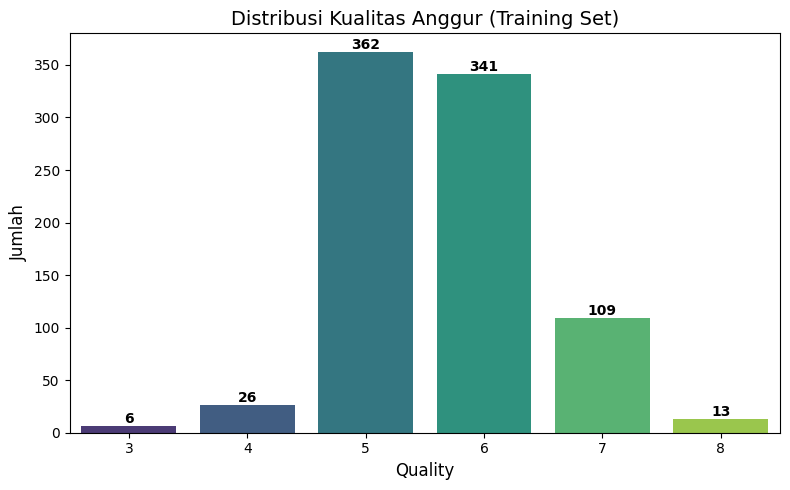

Distribusi jumlah data berdasarkan nilai kualitas anggur:
quality
3      6
4     26
5    362
6    341
7    109
8     13
Name: count, dtype: int64


In [5]:
# 4. Visualisasi Distribusi Quality
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=train, x='quality', palette='viridis')
plt.title("Distribusi Kualitas Anggur (Training Set)", fontsize=14)
plt.xlabel("Quality", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)

# Tambahkan label jumlah di atas tiap bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()
print("Distribusi jumlah data berdasarkan nilai kualitas anggur:")
print(train['quality'].value_counts().sort_index())

data tidak terdistribusi secara seimbang, perlu dilakukan penyeimbangan data

In [6]:
# Menampilkan baris yang duplikat (seluruh kolom sama persis)
duplikat = train[train.duplicated()]

# Menampilkan jika ada
print(duplikat)

# Mengetahui jumlah baris duplikat
print(f"Jumlah duplikat: {train.duplicated().sum()}")


Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality, Id]
Index: []
Jumlah duplikat: 0


tidak ada data yang duplikat

# Pisahkan data

In [7]:
X = train.drop(['quality', 'Id'], axis=1)
y = train['quality']

# Cek bentuk data
print("Shape fitur (X):", X.shape)
print("Shape target (y):", y.shape)


Shape fitur (X): (857, 11)
Shape target (y): (857,)


# Seimbangkan data

In [8]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [9]:
# Scaling dulu (SMOTE sensitif terhadap skala)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [11]:
# Cek distribusi baru
print("Distribusi setelah SMOTE (Oversampling):")
print(Counter(y_resampled))

Distribusi setelah SMOTE (Oversampling):
Counter({5: 362, 7: 362, 6: 362, 4: 362, 8: 362, 3: 362})


<ipython-input-12-0e929bada3df>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y_res_series, palette='Set2')


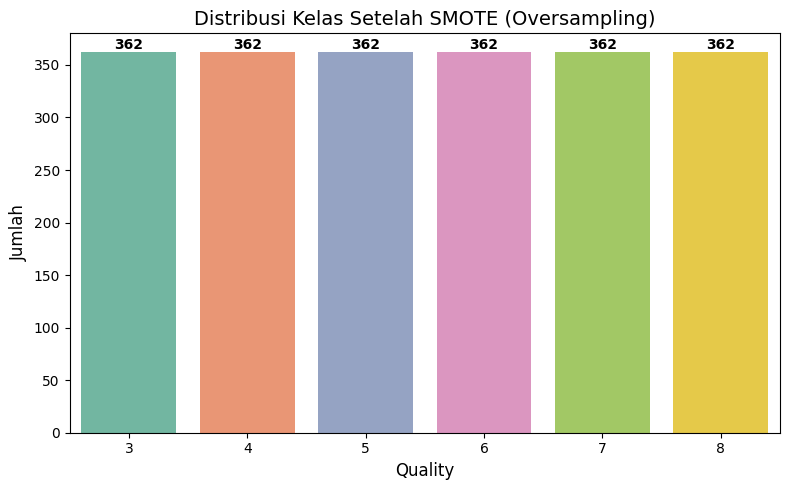

In [12]:
# Konversi y_resampled (ndarray) jadi Series agar bisa langsung dipakai di seaborn
y_res_series = pd.Series(y_resampled, name="quality")

# Plot distribusi
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=y_res_series, palette='Set2')
plt.title("Distribusi Kelas Setelah SMOTE (Oversampling)", fontsize=14)
plt.xlabel("Quality", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)

# Tambahkan label jumlah di atas bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [13]:
# Simpan scaler dan SMOTE object
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(smote, 'smote.pkl')

# Simpan hasil X dan y hasil resampling dalam bentuk file .pkl
joblib.dump(X_resampled, 'X_resampled.pkl')
joblib.dump(y_resampled, 'y_resampled.pkl')


['y_resampled.pkl']

## Split dataset

In [14]:
from sklearn.model_selection import train_test_split

# Split data hasil SMOTE (X_resampled dan y_resampled)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled
)

# Cek ukuran hasil split
print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)


Ukuran data latih: (1737, 11)
Ukuran data uji: (435, 11)


#  Implementasi Model

## Train Model Random Forest

In [15]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

- Menggunakan Random Forest sebagai model

- Melatih model dan melakukan prediksi.

## Evaluasi Model Random Forest

In [16]:
from sklearn.metrics import accuracy_score, classification_report # Import accuracy_score and classification_reportprint("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8482758620689655

Classification Report:
               precision    recall  f1-score   support

           3       0.96      1.00      0.98        72
           4       0.94      0.94      0.94        72
           5       0.71      0.68      0.70        73
           6       0.66      0.59      0.62        73
           7       0.81      0.90      0.86        73
           8       0.97      0.97      0.97        72

    accuracy                           0.85       435
   macro avg       0.84      0.85      0.85       435
weighted avg       0.84      0.85      0.85       435



Hasil evaluasi model menunjukkan performa yang cukup baik setelah dilakukan oversampling. Akurasi model mencapai 85%, yang berarti model berhasil mengklasifikasikan data uji dengan benar dalam 85% kasus. Pada level kelas, model menunjukkan performa yang sangat baik untuk kelas-kelas seperti kelas 3, 4, 7, dan 8, dengan nilai precision dan recall yang tinggi, masing-masing lebih dari 0.9, yang menunjukkan bahwa model sangat baik dalam mengidentifikasi data dari kelas-kelas tersebut. Namun, model mengalami kesulitan dalam mengklasifikasikan kelas 5 dan kelas 6, dengan nilai precision dan recall yang lebih rendah, terutama pada kelas 6 yang memiliki recall sebesar 0.59, yang menunjukkan bahwa model gagal mengenali sebagian besar data kelas tersebut. Secara keseluruhan, macro avg dan weighted avg F1-score sebesar 0.85 menunjukkan bahwa meskipun ada beberapa tantangan pada kelas minoritas, model tetap menunjukkan keseimbangan yang baik dalam pengklasifikasian data.

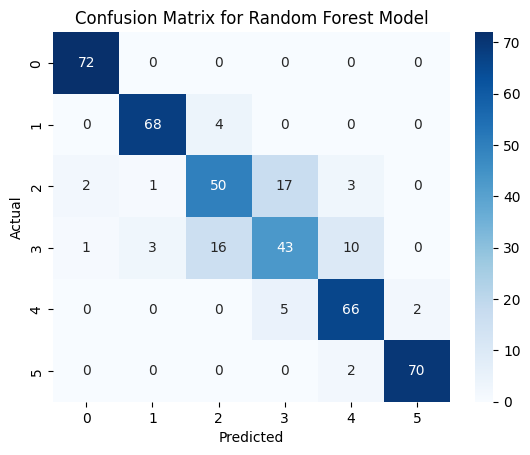

In [17]:
conf_matrix_rf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

# Simpan Model

In [18]:
joblib.dump(rf_model, 'wine_quality_model.pkl')

['wine_quality_model.pkl']

# Predict to data test

In [19]:
# Load kembali scaler dan model
scaler = joblib.load('scaler.pkl')
model = joblib.load('wine_quality_model.pkl')

# Preprocessing test set
X_test = test.drop(['Id'], axis=1)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Prediksi
y_test_pred = model.predict(X_test_scaled)

# Simpan Hasil Prediksi
output = pd.DataFrame({
    'Id': test['Id'],
    'quality': y_test_pred
})

output.to_csv('hasilprediksi_4112322016.csv', index=False)  # ganti 123 dengan 3 NIM terakhir kamu
print("Prediksi berhasil disimpan!")

Prediksi berhasil disimpan!
